In [1]:
# Import all necessary packages
# import ... as ... allows you to change the name of the package on the fly
# That way you can shorten long pacakge names

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import data

In [2]:
data = pd.read_excel('Python Problem.xlsx')

In [3]:
# Check that the file was read in properly and see what 
data.head()

,X,y
0,0.454811,0.448547
1,0.731871,0.645367
2,0.612790,0.598740
3,0.360758,0.465771
4,0.345281,0.373506


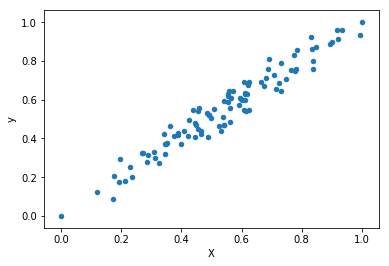

In [4]:
data.plot(kind='scatter',x = 'X', y = 'y')

# Calculate slope and offset of linear regression


$$ m = \frac{\sum{y_i x_i}-\bar{y}\sum{x_i}}{\sum{x_i^2}-\bar{x}\sum{x_i}} $$

$$ b = \frac{\bar{y}\sum{x_i^2}-\bar{x}\sum{y_i x_i}}{\sum{x_i^2}-\bar{x}\sum{x_i}} $$

In [5]:
slope = (np.sum(data['X'] * data['y']) - np.mean(data['y']) * np.sum(data['X'])) / \
        (np.sum(data['X']**2) - np.mean(data['X']) * np.sum(data['X']))

offset = (np.mean(data['y']) * np.sum(data['X']**2) - np.mean(data['X']) * np.sum(data['y'] * data['X'])) / \
         (np.sum(data['X'])**2 + np.mean(data['X']) * np.sum(data['X']))

print('{:.4f}x + {:.4f}'.format(slope, offset))

0.9796x + 0.0000


In [6]:
# Create polynomial with calculated coefficients
lin_reg = np.poly1d([slope, offset])

# Add calculated regression line to dataframe
data['Linear Regression'] = lin_reg(data['X'])

# Calculate R^2 value
def r_squared(x, y, y_fit):
    res = y-y_fit
    ss_res = np.sum(res**2)
    ss_tot = np.sum((y-np.mean(y))**2)
    r_sq = 1 - (ss_res / ss_tot)
    return r_sq

lin_reg_r2 = r_squared(data['X'], data['y'], data['Linear Regression'])

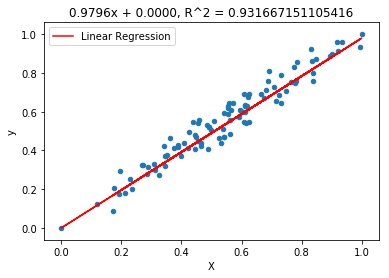

In [7]:
# Plot the data
ax = plt.gca()

data.plot(kind='scatter', x = 'X', y = 'y', ax=ax)
data.plot(kind='line', x = 'X', y = 'Linear Regression', color = 'red',  ax=ax)

plt.title('{:.4f}x + {:.4f}, R^2 = {}'.format(slope, offset, lin_reg_r2))
plt.show()